In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import svm
from sklearn import tree
from sklearn.feature_selection import SelectPercentile, f_classif
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn import metrics
import lime.lime_tabular as lm#the type of LIIME analysis we’ll do
import shap #SHAP package
from sklearn.inspection import permutation_importance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19final-dataset/both_test_unbalanced.csv
/kaggle/input/covid19final-dataset/pcr_unbalanced.csv
/kaggle/input/covid19final-dataset/rapid_balanced.csv
/kaggle/input/covid19final-dataset/both_test_balanced.csv
/kaggle/input/covid19final-dataset/rapid_unbalanced.csv
/kaggle/input/covid19final-dataset/pcr_balanced.csv


In [2]:
data_rapid_unb = pd.read_csv("/kaggle/input/covid19final-dataset/rapid_unbalanced.csv")
data_rapid_unb=data_rapid_unb.astype(int)


data_pcr_unb= pd.read_csv("/kaggle/input/covid19final-dataset/pcr_unbalanced.csv")
data_pcr_unb=data_pcr_unb.astype(int)


both_data_unb = pd.read_csv("/kaggle/input/covid19final-dataset/both_test_unbalanced.csv")


x_col=data_rapid_unb.iloc[:,:10].columns

In [3]:
def RandomForest_classif(x_train,y_train,param):
    #Classification
    
    
    clf= RandomForestClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def Kneighbors_classif(x_train,y_train,param):
    #Classification
    

    clf= KNeighborsClassifier(**param)
    clf= clf.fit(x_train, y_train)
    
    return clf

def DecisionTree_classif(x_train,y_train,param):
    #Classification
    
    clf = tree.DecisionTreeClassifier(**param)
    clf = clf.fit(x_train,y_train)
    
    return clf

def mpl_classif(x_train,y_train,param):
    
    clf =  MLPClassifier(**param)
    clf=clf.fit(x_train,y_train)
    
    return clf

def gb_classif(x_train,y_train,param):
    
    clf=GradientBoostingClassifier(**param)
    clf=clf.fit(x_train, y_train)
    
    return clf

def xgb_classif(x_train,y_train,param):
    clf = xgb.XGBClassifier(**param)
    
    return clf.fit(x_train, y_train)

def svc_classif(x_train,y_train,param):
    
    regr = svm.SVC(**param)
    regr=regr.fit(x_train, y_train)

    return regr

def lg_with_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf
def lg_without_regu_classif(x_train,y_train,param):
    
    clf = LogisticRegression(** param)
    clf=clf.fit(x_train,y_train)
    
    return clf




In [4]:
def calculate_feature_importance(model) :
    feat_importances = pd.Series(model.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))

def calculate_feature_importance2(model) :
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=x_col)
    # determine top most important features
    return feat_importances.nlargest(len(x_col))


In [5]:
def feature_importance(X_train, X_val, y_train, y_val,model,label):
    
    r = permutation_importance(model, X_val, y_val,n_repeats=50,random_state=0)
    for i in r.importances_mean.argsort()[::-1]:
       
            print(f"{X_train.columns[i]:<8}" f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
    sorted_idx = r.importances_mean.argsort()

    fig, ax = plt.subplots()
    ax.boxplot(r.importances[sorted_idx].T,
               vert=False, labels=X_train.columns[sorted_idx])
    ax.set_title("Permutation Importances:"+label)
    fig.tight_layout()
    plt.show()
    


In [6]:
def plot_feature_importance(importance,color_importace,classif_name): 
    indices =importance.values
    features = importance.index
    plt.title(classif_name+'\nTop Feature Importances')
    plt.barh(range(len(indices)), indices, color=color_importace, align='center')
    plt.yticks(range(len(indices)), features)
    plt.xlabel('Relative Importance')
    plt.show()

# rapid_test_unbalanced

In [7]:
x_rapid_unbalan=data_rapid_unb.iloc[:,:10]
y_rapid_unbalan=data_rapid_unb['Class']


In [8]:
lista_param_rapid=[
                {},
                {},
                {'kernel': 'rbf', 'C': 11},
                {'weights': 'distance', 'n_neighbors': 5, 'n_jobs': None, 'leaf_size': 3, 'algorithm': 'kd_tree'},
                {'n_estimators':500,'max_depth':5},
                {'solver': 'saga', 'penalty': 'l2', 'max_iter': 1200, 'C': 0.1},
                {'solver': 'lbfgs', 'penalty': 'l2', 'max_iter': 400, 'C': 4.0},
                {'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
                {'n_estimators':300,'max_depth':9,'min_child_weight': 2}] 

Symptom- Dyspnea0.034 +/- 0.002
Symptom- Olfactory Disorders0.030 +/- 0.001
Symptom- Fever0.029 +/- 0.002
Gender  0.026 +/- 0.001
Symptom- Cough0.021 +/- 0.001
Symptom- Headache0.016 +/- 0.001
Symptom- Throat Pain0.015 +/- 0.001
Symptom- Taste Disorders0.014 +/- 0.001
Symptom- Coryza0.012 +/- 0.001
Are you a health professional?0.009 +/- 0.001


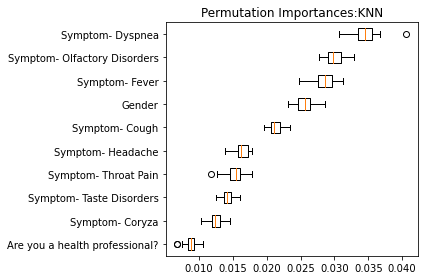

In [9]:
X_train, X_val, y_train, y_val  = train_test_split(x_rapid_unbalan,y_rapid_unbalan, 
                                  test_size=0.5,random_state=0,stratify=y_rapid_unbalan)
model=Kneighbors_classif(X_train,y_train,lista_param_rapid[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Symptom- Dyspnea0.034 +/- 0.002
Symptom- Olfactory Disorders0.030 +/- 0.001
Symptom- Fever0.028 +/- 0.001
Gender  0.024 +/- 0.001
Symptom- Cough0.020 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Headache0.015 +/- 0.001
Symptom- Throat Pain0.014 +/- 0.001
Symptom- Coryza0.012 +/- 0.001
Are you a health professional?0.008 +/- 0.001


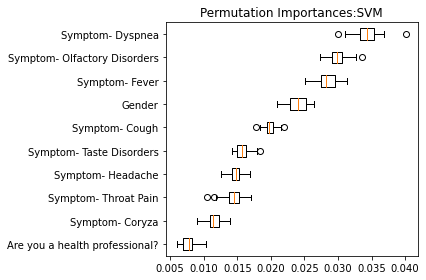

In [10]:
model= svc_classif(X_train,y_train,lista_param_rapid[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')



Symptom- Dyspnea0.034 +/- 0.002
Symptom- Olfactory Disorders0.030 +/- 0.001
Symptom- Fever0.029 +/- 0.002
Gender  0.026 +/- 0.001
Symptom- Cough0.021 +/- 0.001
Symptom- Headache0.016 +/- 0.001
Symptom- Throat Pain0.015 +/- 0.001
Symptom- Taste Disorders0.015 +/- 0.001
Symptom- Coryza0.012 +/- 0.001
Are you a health professional?0.008 +/- 0.001


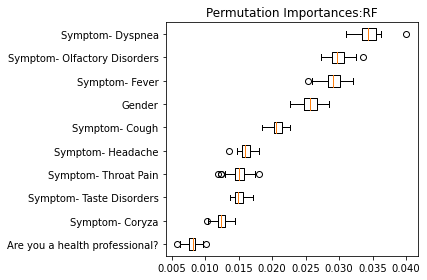

In [11]:
model=RandomForest_classif(X_train,y_train,lista_param_rapid[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

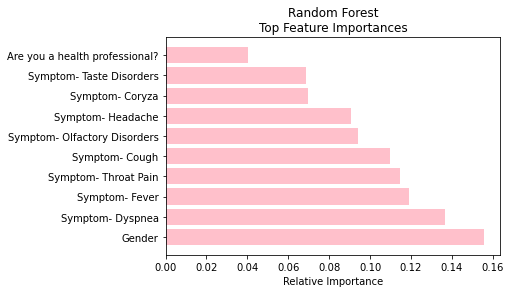

In [12]:
model_rf= RandomForest_classif(x_rapid_unbalan,y_rapid_unbalan,lista_param_rapid[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [13]:
importance_rf

Gender                            0.155887
Symptom- Dyspnea                  0.136657
Symptom- Fever                    0.119233
Symptom- Throat Pain              0.114719
Symptom- Cough                    0.109814
Symptom- Olfactory Disorders      0.094226
Symptom- Headache                 0.090727
Symptom- Coryza                   0.069458
Symptom- Taste Disorders          0.068772
Are you a health professional?    0.040508
dtype: float64

Symptom- Dyspnea0.038 +/- 0.002
Symptom- Olfactory Disorders0.033 +/- 0.001
Symptom- Fever0.030 +/- 0.002
Gender  0.025 +/- 0.001
Symptom- Cough0.022 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Headache0.016 +/- 0.001
Symptom- Throat Pain0.015 +/- 0.001
Symptom- Coryza0.013 +/- 0.001
Are you a health professional?0.009 +/- 0.001


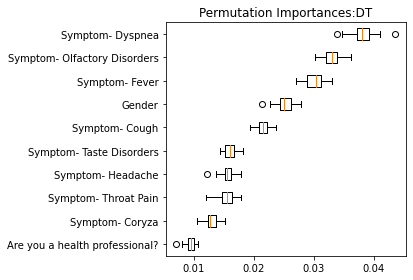

In [14]:
model=DecisionTree_classif(X_train,y_train,lista_param_rapid[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

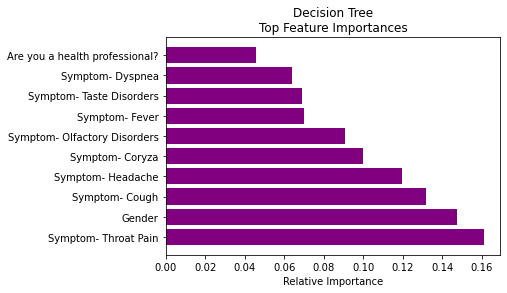

In [15]:
model_dt= DecisionTree_classif(x_rapid_unbalan,y_rapid_unbalan,lista_param_rapid[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [16]:
importance_dt

Symptom- Throat Pain              0.161414
Gender                            0.147461
Symptom- Cough                    0.131981
Symptom- Headache                 0.119704
Symptom- Coryza                   0.099781
Symptom- Olfactory Disorders      0.090909
Symptom- Fever                    0.070212
Symptom- Taste Disorders          0.068868
Symptom- Dyspnea                  0.063974
Are you a health professional?    0.045695
dtype: float64

Symptom- Dyspnea0.035 +/- 0.002
Symptom- Olfactory Disorders0.031 +/- 0.001
Symptom- Fever0.030 +/- 0.002
Gender  0.025 +/- 0.001
Symptom- Cough0.021 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Headache0.015 +/- 0.001
Symptom- Throat Pain0.015 +/- 0.001
Symptom- Coryza0.012 +/- 0.001
Are you a health professional?0.008 +/- 0.001


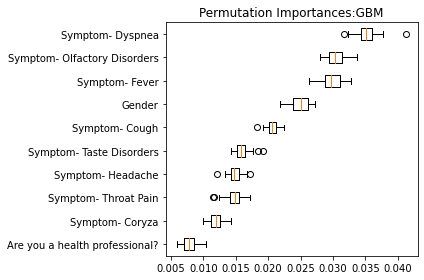

In [17]:
model=gb_classif(X_train,y_train,lista_param_rapid[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

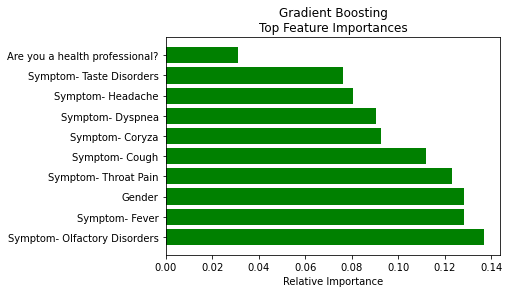

In [18]:
model_gb=gb_classif(x_rapid_unbalan,y_rapid_unbalan,lista_param_rapid[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [19]:
importance_gb

Symptom- Olfactory Disorders      0.137116
Symptom- Fever                    0.128372
Gender                            0.128368
Symptom- Throat Pain              0.123031
Symptom- Cough                    0.112051
Symptom- Coryza                   0.092625
Symptom- Dyspnea                  0.090443
Symptom- Headache                 0.080476
Symptom- Taste Disorders          0.076293
Are you a health professional?    0.031224
dtype: float64

Symptom- Dyspnea0.034 +/- 0.002
Symptom- Olfactory Disorders0.029 +/- 0.001
Symptom- Fever0.029 +/- 0.001
Gender  0.024 +/- 0.001
Symptom- Cough0.020 +/- 0.001
Symptom- Headache0.015 +/- 0.001
Symptom- Taste Disorders0.015 +/- 0.001
Symptom- Throat Pain0.014 +/- 0.001
Symptom- Coryza0.011 +/- 0.001
Are you a health professional?0.008 +/- 0.001


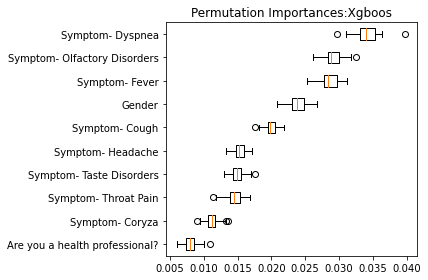

In [20]:
model=xgb_classif(X_train,y_train,lista_param_rapid[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

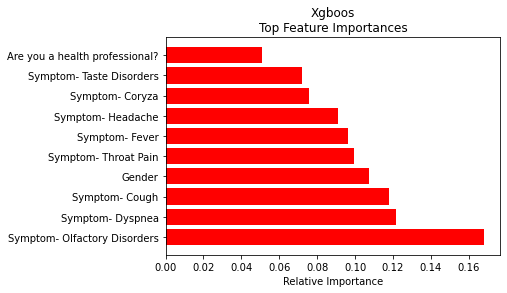

In [21]:
model_xgb=xgb_classif(x_rapid_unbalan,y_rapid_unbalan,lista_param_rapid[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')


In [22]:
importance_xgb

Symptom- Olfactory Disorders      0.168199
Symptom- Dyspnea                  0.121539
Symptom- Cough                    0.117932
Gender                            0.107188
Symptom- Throat Pain              0.099165
Symptom- Fever                    0.096373
Symptom- Headache                 0.090828
Symptom- Coryza                   0.075700
Symptom- Taste Disorders          0.072159
Are you a health professional?    0.050918
dtype: float32

Symptom- Dyspnea0.036 +/- 0.002
Symptom- Olfactory Disorders0.034 +/- 0.002
Symptom- Fever0.031 +/- 0.002
Gender  0.025 +/- 0.001
Symptom- Cough0.021 +/- 0.001
Symptom- Taste Disorders0.021 +/- 0.001
Symptom- Headache0.016 +/- 0.001
Symptom- Throat Pain0.015 +/- 0.001
Symptom- Coryza0.012 +/- 0.001
Are you a health professional?0.010 +/- 0.001


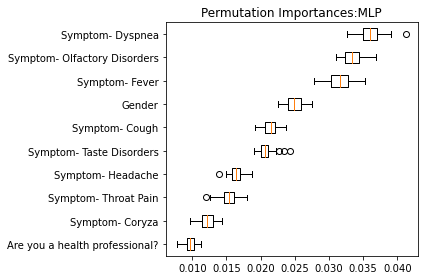

In [23]:
model=mpl_classif(X_train,y_train,lista_param_rapid[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')


Symptom- Dyspnea0.002 +/- 0.001
Symptom- Cough0.001 +/- 0.001
Symptom- Throat Pain0.000 +/- 0.000
Symptom- Taste Disorders0.000 +/- 0.000
Symptom- Fever-0.000 +/- 0.001
Are you a health professional?-0.000 +/- 0.000
Gender  -0.000 +/- 0.000
Symptom- Headache-0.000 +/- 0.000
Symptom- Olfactory Disorders-0.000 +/- 0.001
Symptom- Coryza-0.001 +/- 0.000


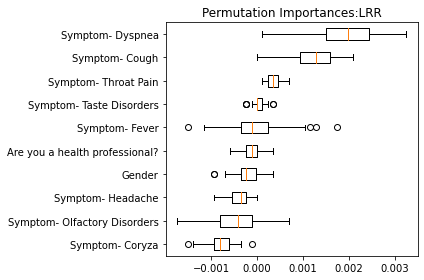

In [24]:
model=lg_with_regu_classif(X_train,y_train,lista_param_rapid[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')



Symptom- Dyspnea0.003 +/- 0.001
Symptom- Olfactory Disorders0.002 +/- 0.001
Symptom- Fever0.001 +/- 0.001
Symptom- Headache0.001 +/- 0.000
Symptom- Cough0.001 +/- 0.001
Symptom- Throat Pain0.000 +/- 0.000
Symptom- Taste Disorders0.000 +/- 0.000
Gender  -0.000 +/- 0.000
Are you a health professional?-0.000 +/- 0.000
Symptom- Coryza-0.000 +/- 0.001


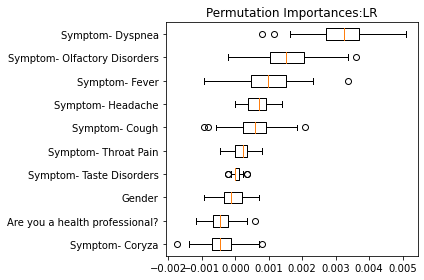

In [25]:
model=lg_without_regu_classif(X_train,y_train,lista_param_rapid[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LR')

# pcr_test_unbalanced

In [26]:
lista_param_pcr=[
                {},
                {},
                {'kernel': 'rbf', 'C': 6},
                {'weights': 'distance', 'n_neighbors': 8, 'n_jobs': -1, 'leaf_size': 2, 'algorithm': 'auto'},
                {'n_estimators':500,'max_depth':5},
                {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
                {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
                {'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
                {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [27]:
x_pcr=data_pcr_unb.iloc[:,:10]
y_pcr=data_pcr_unb['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_pcr,y_pcr,test_size=0.5,random_state=0,stratify=y_pcr)

Symptom- Fever0.255 +/- 0.009
Gender  0.221 +/- 0.009
Symptom- Throat Pain0.088 +/- 0.005
Symptom- Dyspnea0.083 +/- 0.007
Symptom- Cough0.083 +/- 0.006
Are you a health professional?0.042 +/- 0.004
Symptom- Headache0.027 +/- 0.003
Symptom- Taste Disorders0.021 +/- 0.003
Symptom- Coryza0.020 +/- 0.003
Symptom- Olfactory Disorders0.017 +/- 0.002


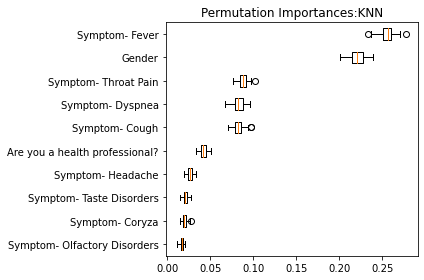

In [28]:
model=Kneighbors_classif(X_train,y_train,lista_param_rapid[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Symptom- Fever0.248 +/- 0.008
Gender  0.212 +/- 0.010
Symptom- Throat Pain0.086 +/- 0.005
Symptom- Dyspnea0.082 +/- 0.007
Symptom- Cough0.080 +/- 0.006
Are you a health professional?0.039 +/- 0.004
Symptom- Taste Disorders0.030 +/- 0.003
Symptom- Headache0.021 +/- 0.003
Symptom- Coryza0.019 +/- 0.003
Symptom- Olfactory Disorders0.013 +/- 0.003


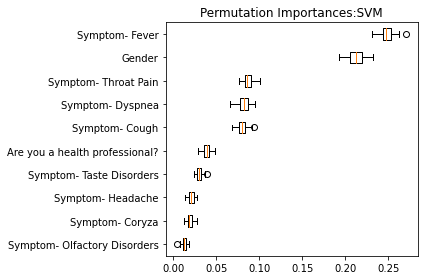

In [29]:
model= svc_classif(X_train,y_train,lista_param_rapid[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

Symptom- Fever0.254 +/- 0.009
Gender  0.218 +/- 0.009
Symptom- Throat Pain0.087 +/- 0.005
Symptom- Dyspnea0.081 +/- 0.006
Symptom- Cough0.081 +/- 0.005
Are you a health professional?0.043 +/- 0.004
Symptom- Olfactory Disorders0.024 +/- 0.003
Symptom- Headache0.023 +/- 0.003
Symptom- Coryza0.022 +/- 0.003
Symptom- Taste Disorders0.022 +/- 0.003


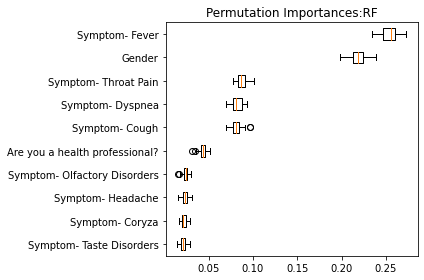

In [30]:
model=RandomForest_classif(X_train,y_train,lista_param_rapid[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

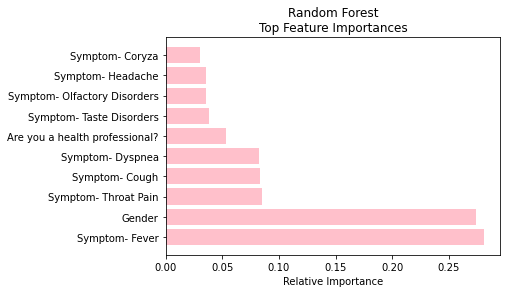

In [31]:
model_rf= RandomForest_classif(x_pcr,y_pcr,lista_param_pcr[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')


In [32]:
importance_rf

Symptom- Fever                    0.281438
Gender                            0.274100
Symptom- Throat Pain              0.085009
Symptom- Cough                    0.083089
Symptom- Dyspnea                  0.082387
Are you a health professional?    0.053366
Symptom- Taste Disorders          0.038633
Symptom- Olfactory Disorders      0.035997
Symptom- Headache                 0.035715
Symptom- Coryza                   0.030266
dtype: float64

Symptom- Fever0.252 +/- 0.009
Gender  0.213 +/- 0.010
Symptom- Throat Pain0.090 +/- 0.005
Symptom- Dyspnea0.082 +/- 0.007
Symptom- Cough0.081 +/- 0.005
Are you a health professional?0.041 +/- 0.004
Symptom- Taste Disorders0.033 +/- 0.003
Symptom- Olfactory Disorders0.025 +/- 0.003
Symptom- Headache0.024 +/- 0.003
Symptom- Coryza0.023 +/- 0.003


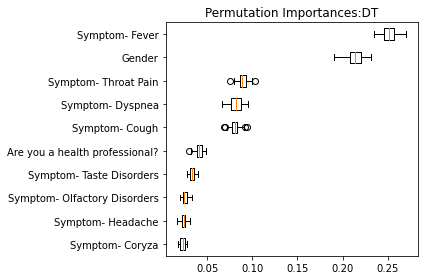

In [33]:
model=DecisionTree_classif(X_train,y_train,lista_param_rapid[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

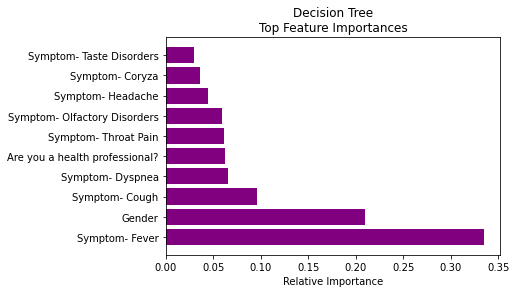

In [34]:
model_dt= DecisionTree_classif(x_pcr,y_pcr,lista_param_pcr[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [35]:
importance_dt

Symptom- Fever                    0.335249
Gender                            0.209740
Symptom- Cough                    0.096083
Symptom- Dyspnea                  0.065201
Are you a health professional?    0.062675
Symptom- Throat Pain              0.061564
Symptom- Olfactory Disorders      0.058818
Symptom- Headache                 0.044438
Symptom- Coryza                   0.036523
Symptom- Taste Disorders          0.029709
dtype: float64

Symptom- Fever0.249 +/- 0.009
Gender  0.212 +/- 0.010
Symptom- Throat Pain0.085 +/- 0.005
Symptom- Dyspnea0.081 +/- 0.006
Symptom- Cough0.076 +/- 0.005
Are you a health professional?0.041 +/- 0.004
Symptom- Taste Disorders0.032 +/- 0.003
Symptom- Headache0.024 +/- 0.003
Symptom- Coryza0.022 +/- 0.003
Symptom- Olfactory Disorders0.018 +/- 0.003


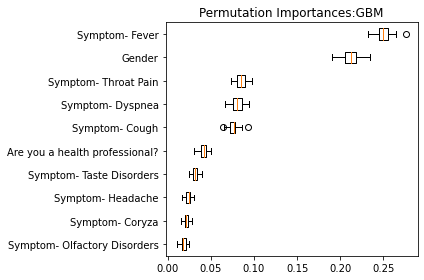

In [36]:
model=gb_classif(X_train,y_train,lista_param_rapid[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

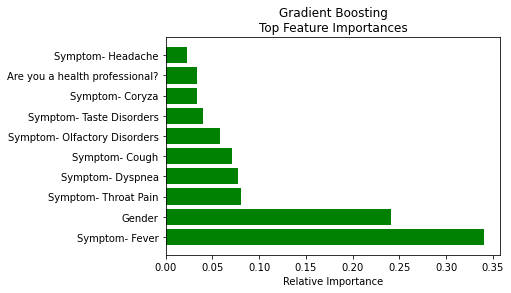

In [37]:
model_gb=gb_classif(x_pcr,y_pcr,lista_param_pcr[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [38]:
importance_gb

Symptom- Fever                    0.341016
Gender                            0.241257
Symptom- Throat Pain              0.080456
Symptom- Dyspnea                  0.077074
Symptom- Cough                    0.071470
Symptom- Olfactory Disorders      0.057995
Symptom- Taste Disorders          0.039731
Symptom- Coryza                   0.034139
Are you a health professional?    0.033691
Symptom- Headache                 0.023172
dtype: float64

Symptom- Fever0.217 +/- 0.008
Gender  0.206 +/- 0.009
Symptom- Cough0.105 +/- 0.007
Symptom- Dyspnea0.093 +/- 0.007
Symptom- Throat Pain0.075 +/- 0.005
Are you a health professional?0.044 +/- 0.004
Symptom- Taste Disorders0.032 +/- 0.003
Symptom- Headache0.019 +/- 0.003
Symptom- Olfactory Disorders0.016 +/- 0.003
Symptom- Coryza0.013 +/- 0.003


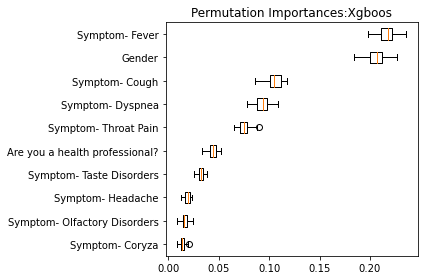

In [39]:
model=xgb_classif(X_train,y_train,lista_param_rapid[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

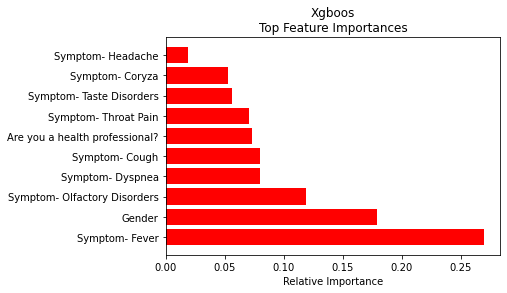

In [40]:
model_xgb=xgb_classif(x_pcr,y_pcr,lista_param_pcr[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [41]:
importance_xgb

Symptom- Fever                    0.269794
Gender                            0.179236
Symptom- Olfactory Disorders      0.118572
Symptom- Dyspnea                  0.080200
Symptom- Cough                    0.079763
Are you a health professional?    0.073217
Symptom- Throat Pain              0.070873
Symptom- Taste Disorders          0.056058
Symptom- Coryza                   0.053023
Symptom- Headache                 0.019266
dtype: float32

Symptom- Fever0.247 +/- 0.009
Gender  0.214 +/- 0.010
Symptom- Throat Pain0.089 +/- 0.005
Symptom- Dyspnea0.081 +/- 0.007
Symptom- Cough0.081 +/- 0.006
Are you a health professional?0.042 +/- 0.004
Symptom- Olfactory Disorders0.034 +/- 0.003
Symptom- Taste Disorders0.032 +/- 0.004
Symptom- Headache0.028 +/- 0.004
Symptom- Coryza0.026 +/- 0.003


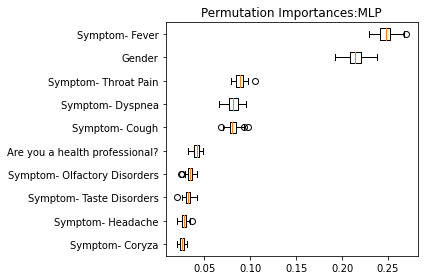

In [42]:
model=mpl_classif(X_train,y_train,lista_param_rapid[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

Gender  0.188 +/- 0.009
Symptom- Fever0.182 +/- 0.007
Symptom- Olfactory Disorders0.019 +/- 0.004
Are you a health professional?0.002 +/- 0.002
Symptom- Throat Pain0.000 +/- 0.001
Symptom- Cough0.000 +/- 0.000
Symptom- Coryza0.000 +/- 0.000
Symptom- Dyspnea0.000 +/- 0.000
Symptom- Taste Disorders-0.000 +/- 0.001
Symptom- Headache-0.000 +/- 0.000


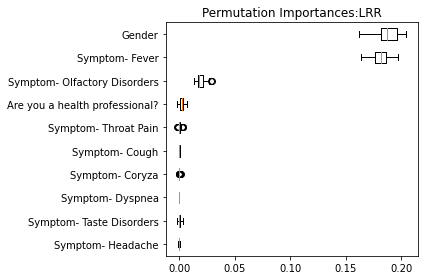

In [43]:
model=lg_with_regu_classif(X_train,y_train,lista_param_rapid[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

Gender  0.186 +/- 0.010
Symptom- Fever0.182 +/- 0.007
Symptom- Olfactory Disorders0.021 +/- 0.004
Are you a health professional?0.002 +/- 0.001
Symptom- Headache0.001 +/- 0.001
Symptom- Throat Pain0.001 +/- 0.001
Symptom- Dyspnea0.000 +/- 0.001
Symptom- Coryza0.000 +/- 0.001
Symptom- Taste Disorders-0.000 +/- 0.001
Symptom- Cough-0.000 +/- 0.000


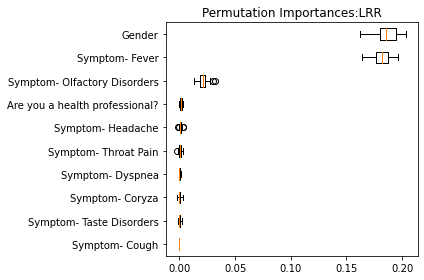

In [44]:
model=lg_without_regu_classif(X_train,y_train,lista_param_rapid[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

# both_test_unbalanced

In [45]:
lista_param_both=lista_param=[{},{},{'kernel': 'rbf', 'C': 8},
             {'n_neighbors': 15},
             {'n_estimators':500,'max_depth':5},
             {'solver': 'liblinear', 'penalty': 'l2','C': 0.1},
             {'solver': 'liblinear', 'penalty': 'l2','C': 1.0},
             {'max_iter': 1800,'solver':'lbfgs', 'alpha':1e-5, 'random_state':42},
            {'n_estimators':300,'max_depth':9,'min_child_weight': 2}]

In [46]:
x_both=both_data_unb.iloc[:,:10]
y_both=both_data_unb['Class']
X_train, X_val, y_train, y_val  = train_test_split(x_both,y_both, 
                                  test_size=0.5,random_state=0,stratify=y_both)

Symptom- Dyspnea0.034 +/- 0.001
Symptom- Fever0.034 +/- 0.002
Gender  0.026 +/- 0.001
Symptom- Olfactory Disorders0.026 +/- 0.001
Symptom- Cough0.024 +/- 0.001
Symptom- Throat Pain0.017 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Headache0.014 +/- 0.001
Are you a health professional?0.013 +/- 0.001
Symptom- Coryza0.012 +/- 0.001


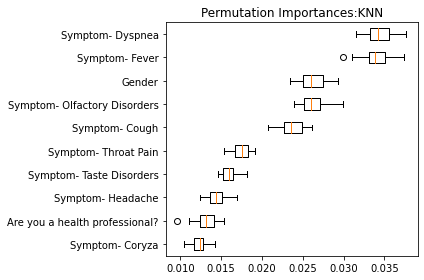

In [47]:
model=Kneighbors_classif(X_train,y_train,lista_param_rapid[3])
feature_importance(X_train, X_val, y_train, y_val,model,'KNN')


Symptom- Dyspnea0.034 +/- 0.002
Symptom- Fever0.033 +/- 0.002
Gender  0.025 +/- 0.001
Symptom- Olfactory Disorders0.025 +/- 0.001
Symptom- Cough0.023 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Throat Pain0.016 +/- 0.001
Symptom- Headache0.013 +/- 0.001
Are you a health professional?0.012 +/- 0.001
Symptom- Coryza0.012 +/- 0.001


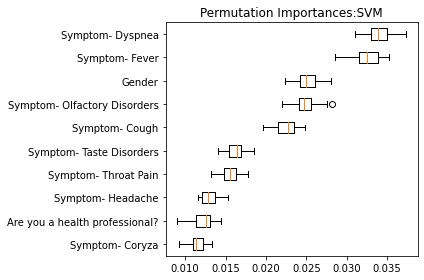

In [48]:
model= svc_classif(X_train,y_train,lista_param_rapid[2])
feature_importance(X_train, X_val, y_train, y_val,model,'SVM')

Symptom- Dyspnea0.035 +/- 0.002
Symptom- Fever0.033 +/- 0.002
Symptom- Olfactory Disorders0.026 +/- 0.001
Gender  0.026 +/- 0.001
Symptom- Cough0.023 +/- 0.001
Symptom- Throat Pain0.017 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Headache0.014 +/- 0.001
Are you a health professional?0.012 +/- 0.001
Symptom- Coryza0.012 +/- 0.001


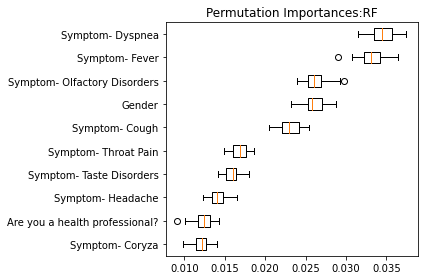

In [49]:
model=RandomForest_classif(X_train,y_train,lista_param_rapid[1])
feature_importance(X_train, X_val, y_train, y_val,model,'RF')

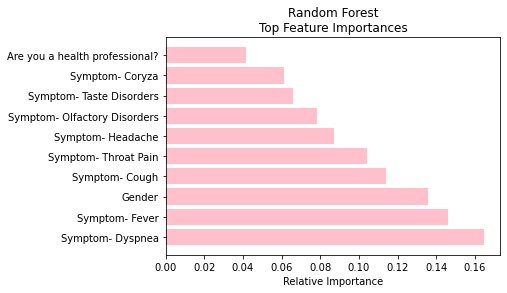

In [50]:
model_rf= RandomForest_classif(x_both,y_both,lista_param_both[1])
importance_rf=calculate_feature_importance(model_rf)
plot_feature_importance(importance_rf,'pink','Random Forest')

In [51]:
importance_rf

Symptom- Dyspnea                  0.164964
Symptom- Fever                    0.146174
Gender                            0.135981
Symptom- Cough                    0.113885
Symptom- Throat Pain              0.104313
Symptom- Headache                 0.087143
Symptom- Olfactory Disorders      0.078448
Symptom- Taste Disorders          0.066084
Symptom- Coryza                   0.061275
Are you a health professional?    0.041732
dtype: float64

Symptom- Dyspnea0.036 +/- 0.002
Symptom- Fever0.034 +/- 0.002
Symptom- Olfactory Disorders0.026 +/- 0.001
Gender  0.026 +/- 0.001
Symptom- Cough0.023 +/- 0.001
Symptom- Taste Disorders0.016 +/- 0.001
Symptom- Throat Pain0.016 +/- 0.001
Symptom- Headache0.014 +/- 0.001
Are you a health professional?0.013 +/- 0.001
Symptom- Coryza0.011 +/- 0.001


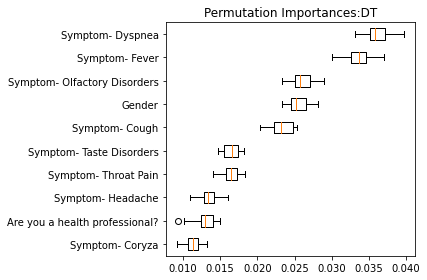

In [52]:
model=DecisionTree_classif(X_train,y_train,lista_param_rapid[0])
feature_importance(X_train, X_val, y_train, y_val,model,'DT')

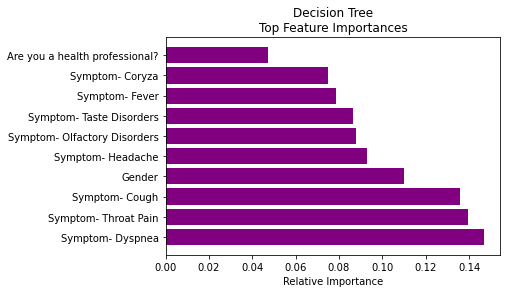

In [53]:
model_dt= DecisionTree_classif(x_both,y_both,lista_param_both[0])
importance_dt=calculate_feature_importance(model_dt)
plot_feature_importance(importance_dt,'purple','Decision Tree')

In [54]:
importance_dt

Symptom- Dyspnea                  0.147071
Symptom- Throat Pain              0.139589
Symptom- Cough                    0.135951
Gender                            0.110149
Symptom- Headache                 0.092823
Symptom- Olfactory Disorders      0.087642
Symptom- Taste Disorders          0.086305
Symptom- Fever                    0.078385
Symptom- Coryza                   0.074699
Are you a health professional?    0.047386
dtype: float64

Symptom- Dyspnea0.034 +/- 0.002
Symptom- Fever0.033 +/- 0.001
Symptom- Olfactory Disorders0.027 +/- 0.001
Gender  0.025 +/- 0.001
Symptom- Cough0.022 +/- 0.001
Symptom- Taste Disorders0.017 +/- 0.001
Symptom- Throat Pain0.016 +/- 0.001
Symptom- Headache0.013 +/- 0.001
Are you a health professional?0.012 +/- 0.001
Symptom- Coryza0.012 +/- 0.001


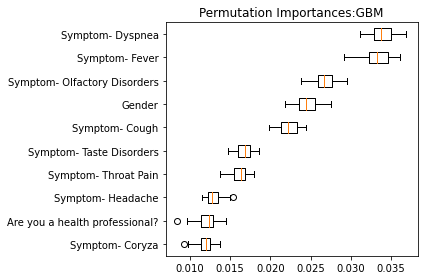

In [55]:
model=gb_classif(X_train,y_train,lista_param_rapid[4])
feature_importance(X_train, X_val, y_train, y_val,model,'GBM')

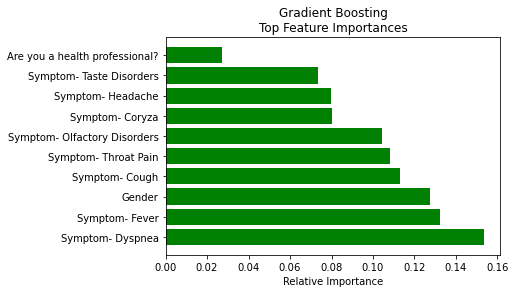

In [56]:
model_gb=gb_classif(x_both,y_both,lista_param_both[4])
importance_gb=calculate_feature_importance(model_gb)
plot_feature_importance(importance_gb,'green','Gradient Boosting')


In [57]:
importance_gb

Symptom- Dyspnea                  0.153735
Symptom- Fever                    0.132281
Gender                            0.127716
Symptom- Cough                    0.112988
Symptom- Throat Pain              0.108046
Symptom- Olfactory Disorders      0.104399
Symptom- Coryza                   0.080223
Symptom- Headache                 0.079947
Symptom- Taste Disorders          0.073663
Are you a health professional?    0.027004
dtype: float64

Symptom- Dyspnea0.035 +/- 0.001
Symptom- Fever0.033 +/- 0.002
Symptom- Olfactory Disorders0.027 +/- 0.001
Gender  0.025 +/- 0.001
Symptom- Cough0.022 +/- 0.001
Symptom- Taste Disorders0.017 +/- 0.001
Symptom- Throat Pain0.017 +/- 0.001
Symptom- Headache0.014 +/- 0.001
Are you a health professional?0.013 +/- 0.001
Symptom- Coryza0.012 +/- 0.001


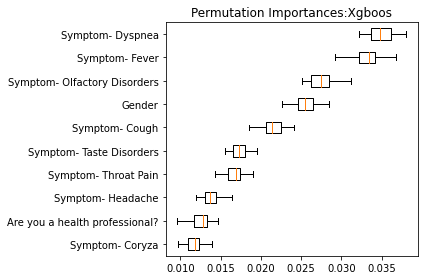

In [58]:
model=xgb_classif(X_train,y_train,lista_param_rapid[8])
feature_importance(X_train, X_val, y_train, y_val,model,'Xgboos')

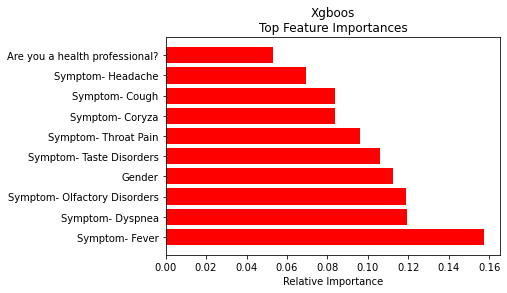

In [59]:
model_xgb=xgb_classif(x_both,y_both,lista_param_both[8])
importance_xgb=calculate_feature_importance(model_xgb)
plot_feature_importance(importance_xgb,'red','Xgboos')

In [60]:
importance_xgb

Symptom- Fever                    0.157562
Symptom- Dyspnea                  0.119415
Symptom- Olfactory Disorders      0.118736
Gender                            0.112409
Symptom- Taste Disorders          0.106029
Symptom- Throat Pain              0.096155
Symptom- Coryza                   0.083810
Symptom- Cough                    0.083501
Symptom- Headache                 0.069304
Are you a health professional?    0.053079
dtype: float32

Symptom- Dyspnea0.035 +/- 0.001
Symptom- Fever0.034 +/- 0.001
Gender  0.027 +/- 0.001
Symptom- Olfactory Disorders0.027 +/- 0.001
Symptom- Cough0.023 +/- 0.001
Symptom- Taste Disorders0.018 +/- 0.001
Symptom- Throat Pain0.018 +/- 0.001
Symptom- Headache0.015 +/- 0.001
Are you a health professional?0.014 +/- 0.001
Symptom- Coryza0.012 +/- 0.001


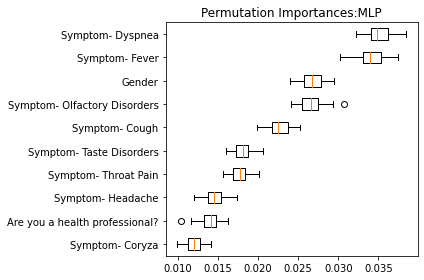

In [61]:
model=mpl_classif(X_train,y_train,lista_param_rapid[7])
feature_importance(X_train, X_val, y_train, y_val,model,'MLP')

Symptom- Dyspnea0.001 +/- 0.001
Symptom- Taste Disorders0.000 +/- 0.000
Symptom- Throat Pain0.000 +/- 0.000
Are you a health professional?0.000 +/- 0.000
Symptom- Headache0.000 +/- 0.000
Symptom- Cough-0.000 +/- 0.000
Symptom- Coryza-0.000 +/- 0.000
Symptom- Fever-0.001 +/- 0.001
Symptom- Olfactory Disorders-0.001 +/- 0.001
Gender  -0.001 +/- 0.001


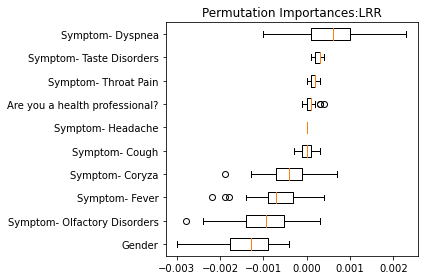

In [62]:
model=lg_with_regu_classif(X_train,y_train,lista_param_rapid[5])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')

Symptom- Dyspnea0.001 +/- 0.001
Symptom- Taste Disorders0.000 +/- 0.000
Symptom- Headache0.000 +/- 0.000
Symptom- Throat Pain-0.000 +/- 0.000
Symptom- Cough-0.000 +/- 0.000
Are you a health professional?-0.000 +/- 0.000
Symptom- Fever-0.001 +/- 0.001
Symptom- Coryza-0.001 +/- 0.001
Symptom- Olfactory Disorders-0.001 +/- 0.001
Gender  -0.002 +/- 0.001


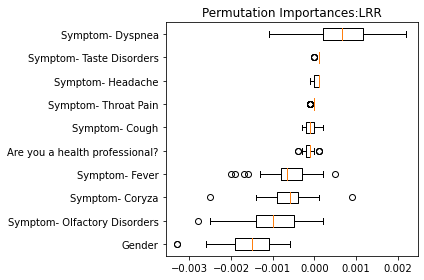

In [63]:
model=lg_without_regu_classif(X_train,y_train,lista_param_rapid[6])
feature_importance(X_train, X_val, y_train, y_val,model,'LRR')